In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [30]:
# load data
file_path = r"../datasets/"
train_file = r"train.csv"
test_file = r"test.csv"
subm_file = r"sample_submission.csv"

raw_train_data = pd.read_csv(file_path+train_file)
raw_test_data = pd.read_csv(file_path+test_file)

raw_train_data.shape

(7613, 5)

In [24]:
max_length = 0
count = 0
for i in range(0, raw_train_data.shape[0]):
    length = len(raw_train_data['text'].iloc[i])
    if length > max_length:
        max_length = length
    if length > 128:
        count += 1
count

2356

<Axes: >

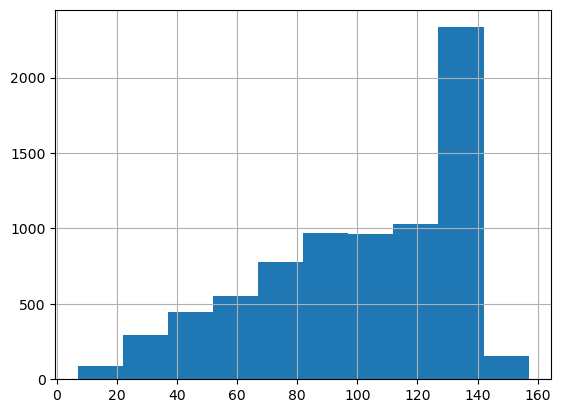

In [16]:
raw_train_data['text'].apply(lambda x: len(x)).hist()

In [4]:
# max_sequence_length = 64  # 设置你的最大序列长度

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # 对训练数据进行处理
# raw_train_data['text'] = raw_train_data['text'].apply(lambda x: x[:max_sequence_length])  # 截断文本
# raw_train_data['text'] = raw_train_data['text'].apply(lambda x: x.ljust(max_sequence_length))  # 填充文本

# # 对测试数据进行处理
# raw_test_data['text'] = raw_test_data['text'].apply(lambda x: x[:max_sequence_length])  # 截断文本
# raw_test_data['text'] = raw_test_data['text'].apply(lambda x: x.ljust(max_sequence_length))  # 填充文本

# # 对文本进行令牌化
# train_data = raw_train_data['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
# test_data = raw_test_data['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


In [31]:
# Tokenize the text using BERT's tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenize the text using BERT's tokenizer and ensure uniform sequence length
max_sequence_length = 128  # Adjust to an appropriate sequence length

raw_train_data['text'] = raw_train_data['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=max_sequence_length, truncation=True, padding='max_length'))
raw_test_data['text'] = raw_test_data['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=max_sequence_length, truncation=True, padding='max_length'))
raw_train_data['text'].head()

TypeError: BertTokenizer._tokenize() got an unexpected keyword argument 'truncation'

<Axes: >

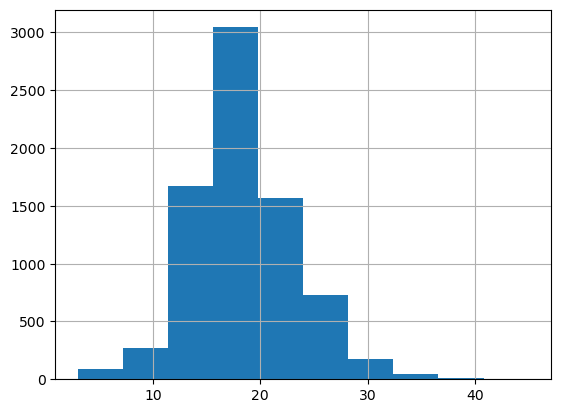

In [6]:
train_data.apply(lambda x: len(x)).hist()

In [7]:
# Split the data into train and train sets
train_data, val_data, train_labels, val_labels = train_test_split(raw_train_data['text'], raw_train_data['target'], test_size=0.2, random_state=42)
test_data = raw_test_data['text']

train_data = torch.LongTensor(train_data.tolist())
train_labels = torch.LongTensor(train_labels.tolist())
val_data = torch.LongTensor(val_data.tolist())
val_labels = torch.LongTensor(val_labels.tolist())

ValueError: too many dimensions 'str'

In [51]:
len(raw_train_data['text'].iloc[0])

20

In [48]:
# Split the data into train and train sets
train_data, val_data, train_labels, val_labels = train_test_split(raw_train_data['text'], raw_train_data['target'], test_size=0.2, random_state=42)
test_data = raw_test_data['text']

# train_data = train_data.tolist()
# train_labels = train_labels.tolist()
# val_data = val_data.tolist()
# val_labels = val_labels.tolist()

train_data = torch.LongTensor(train_data.tolist())
train_labels = torch.LongTensor(train_labels.tolist())
val_data = torch.LongTensor(val_data.tolist())
val_labels = torch.LongTensor(val_labels.tolist())

ValueError: expected sequence of length 41 at dim 1 (got 32)

# Analyze

In [6]:
raw_train_data['text'].iloc[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [23]:
# check if the sample is balanced
n_p_sample = raw_train_data[raw_train_data['target'] == 1].shape[0]
n_sample = raw_train_data.shape[0]
perc_p_sample = n_p_sample/n_sample
perc_p_sample

0.4296597924602653

The training sample is kind of balanced

In [29]:
# number of different location
raw_train_data['location'].unique()

3342

array([[<Axes: title={'center': 'id'}>]], dtype=object)

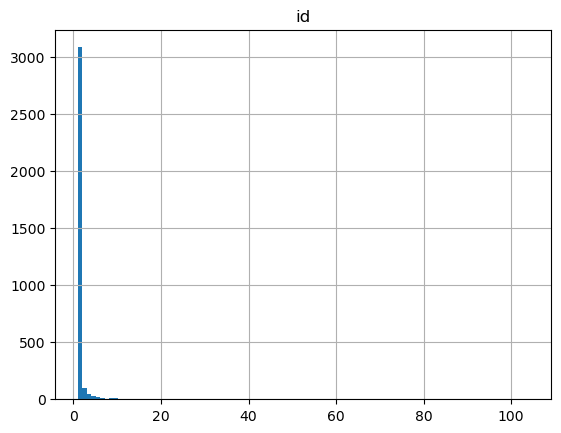

In [35]:
# number of disaster tweets in each location
raw_train_data[['location', 'id']].groupby('location').count().hist(bins=100)

In [36]:
# data cleaning 
raw_train_data["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [ ]:
X = raw_train_data["text"]
y = raw_train_data["target"]
# X represents your features, and y represents your labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)